# DSW Export for PanAn 1/10th

In [3]:
import intake
import glob
import dask.distributed as dsk
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr
import numpy as np
import xesmf as xe
import gsw

import cmocean as cm
import cartopy.crs as ccrs

import cartopy.feature as cft
import matplotlib.path as mpath

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [4]:
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [5]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41427,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:34985,Total threads: 1
Dashboard: /proxy/38679/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:43183,


In [6]:
# Importing data
pathsC = np.sort(glob.glob('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/*/*.ocean_month_z.nc'))
pathsM = np.sort(glob.glob('/g/data/g40/akm157/model_output/mom6-panan/panant-01-zstar-ssp126-MW-only/*/*.ocean_month_z.nc'))

### Checking contour mask

In [7]:
# Contour mask
contour_mask = xr.open_dataset('/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc')

In [8]:
contour_mask

<xarray.Dataset> Size: 38MB
Dimensions:                    (yh: 533, xq: 3600, yq: 533, xh: 3600)
Coordinates:
  * yh                         (yh) float64 4kB -79.0 -78.95 ... -55.12 -55.07
  * xq                         (xq) float64 29kB -279.9 -279.8 ... 79.9 80.0
  * yq                         (yq) float64 4kB -78.98 -78.93 ... -55.1 -55.04
  * xh                         (xh) float64 29kB -279.9 -279.8 ... 79.85 79.95
Data variables:
    mask_x_transport           (yh, xq) float32 8MB ...
    mask_y_transport           (yq, xh) float32 8MB ...
    mask_x_transport_numbered  (yh, xq) float32 8MB ...
    mask_y_transport_numbered  (yq, xh) float32 8MB ...
    contour_masked_above       (yh, xh) float32 8MB ...

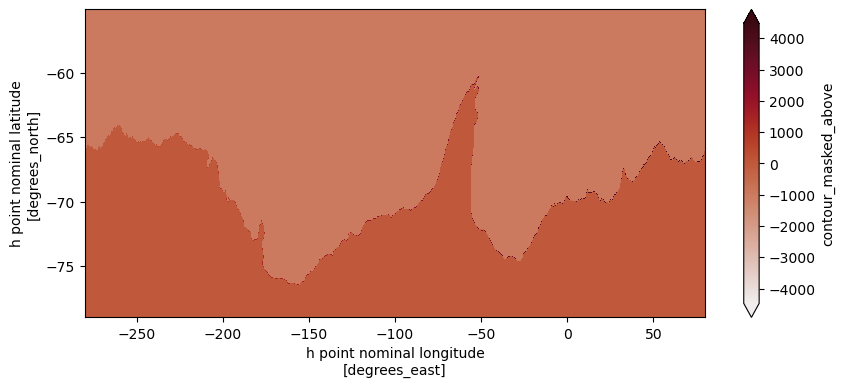

In [14]:
plt.figure(1, figsize=(10, 4))
contour_mask['contour_masked_above'].plot(extend='both', cmap = cm.cm.amp)

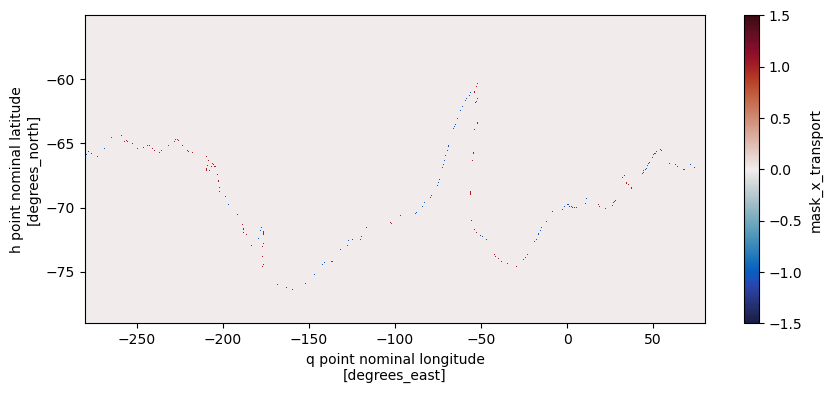

In [17]:
plt.figure(1, figsize=(10, 4))
contour_mask['mask_x_transport'].plot(cmap=cm.cm.balance, vmin=-1.5, vmax=1.5);

### Load transports `tx_trans` and `ty_trans`